# Data Engineering - Filter interesting data

## Import librairies

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [16]:
df = pd.read_csv('survey_results_public.csv')
print(len(df))
df.head()

73268


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


## Filter the column for the dataset of the first page

The input columns will be used as a filter. These are the columns to keep :

- YearsCodePro (Years of coding as a pro)
- EdLevel (Education level)
- Devtype (Development type)
- Country
- OrgSize (Organization Size)

The output columns to keep are :

- CompTotal (Total Salary)
- CompFreq (Annual or mensual salary)

These two columns can be broadcaster into one, for instance converting everything into an annual salary.

Additionnally, the following columns have to be filtered :

The MainBranch column will have to be filtered to only keep the line containing "I am a developer by profession".



In [65]:
# Filter the data to only keep profesionnal developers
print(len(df))
df_filtered = df[df['MainBranch'].str.contains("I am a developer by profession")]
print(len(df_filtered))

selectedInput = [
    'EdLevel',
    'DevType',
    'OrgSize',
    'Country',
    'YearsCodePro'
]
selectedOutput = [
    'CompTotal',
    'CompFreq'
]

df_features = df_filtered[selectedInput + selectedOutput]
# Remove row that have NaN salary
df_features = df_features[df_features['CompTotal'].notna()]
df_features = df_features[df_features['CompFreq'].notna()]

# Convert monthly salary to yearly, then drop the CompTotal and CompFreq columns
df_features['YearlySalary'] = df_features.apply(lambda row: float(row['CompTotal']) * 12 if row['CompFreq'] == "Monthly" else row['CompTotal'], axis=1)
df_features = df_features.drop(['CompTotal', 'CompFreq'] , axis=1)

# Filter outliers
max_yearly_salary = 1e7
df_features = df_features.loc[df_features['YearlySalary'] < max_yearly_salary]

print(len(df_features))

df_features

73268
53507
34035


,EdLevel,DevType,OrgSize,Country,YearsCodePro,YearlySalary
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",100 to 499 employees,Israel,17,720000.0
8,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end",I don’t know,Netherlands,6,46000.0
10,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,2,48000.0
12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",2 to 9 employees,United States of America,5,65000.0
14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, full-stack;Academic researcher;DevO...","5,000 to 9,999 employees",United States of America,5,110000.0
...,...,...,...,...,...,...
73259,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end",10 to 19 employees,Poland,2,96000.0
73261,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, full-stack","10,000 or more employees",France,2,36000.0
73263,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",100 to 499 employees,Nigeria,5,60000.0
73264,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Data scientist or machine learning specialist,I don’t know,United States of America,5,107000.0


<AxesSubplot: xlabel='YearlySalary', ylabel='EdLevel'>

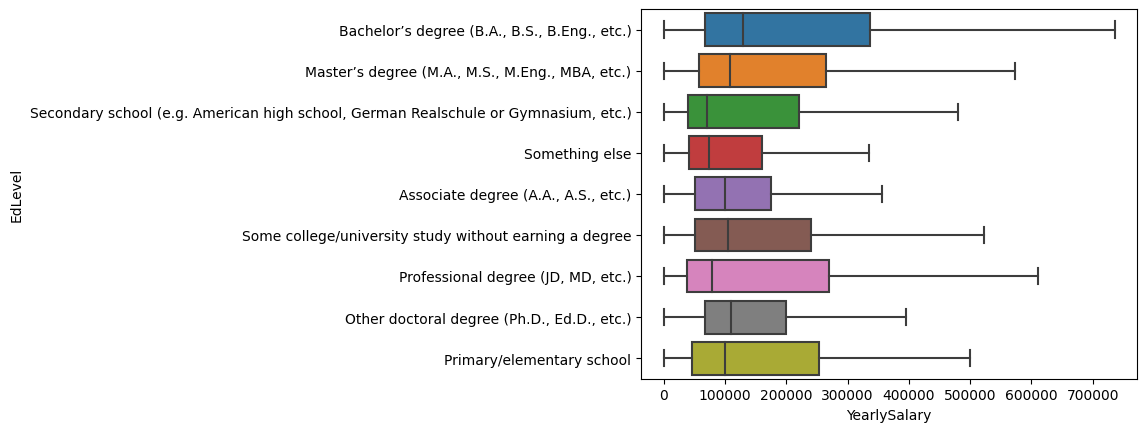

In [75]:
sns.boxplot(x='YearlySalary', y='EdLevel', data=df_features, showfliers=False, orient="h")